<a href="https://colab.research.google.com/github/sharifashik591/Attendence_Based_Face_Recognation/blob/main/Attendence_Based_Face_Recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=9accd97d3e9ee82047882d000a98064c2a5fbb886aa21e4a854e9883dddd5758
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import dlib
import os
import numpy as np
import pandas as pd
from datetime import datetime

# for image processing
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2


In [3]:
import face_recognition

In [4]:
path='/content/drive/MyDrive/Dataset/image/facerecognation'
imgData=[]
imgName=[]


In [5]:
# for load and encode all images
for img in os.listdir(path):
  # print(img)
  imgPath=os.path.join(path,img)
  loadImg=face_recognition.load_image_file(imgPath)
  encodImg=face_recognition.face_encodings(loadImg)[0]
  imgData.append(encodImg)

  # for extract image class name
  name=img.split('.')[0]
  # print(name)
  imgName.append(name)

In [6]:
print(len(imgData))
print(len(imgName))

3
3


In [18]:
# timeFrame=datetime.now()
# name='ashik3'
# df=pd.DataFrame(columns=['Name','time'])
# df=df.append({'Name':name,'time':timeFrame},ignore_index=True)
# df.to_csv('attendence.csv')

In [36]:
# Attendence function
# def AttendenceFunction(data):
  # timeFrame=timeFrame.strftime("%Y-%m-%d %H:%M:%S")
  # NewDf=pd.read_csv('attendence.csv')
  # attendenceName=[]

  # for i in NewDf.Name:
  #   if i !=name:
  #     NewDf=NewDf.append({'Name':name,'time':timeFrame},ignore_index=True)  
  #     NewDf.to_csv('attendence.csv',index=False)  
  #     break
  #   else:
  #     print('Your attendence already counted')

  # return NewDf



## **Open camera with google colab**

In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


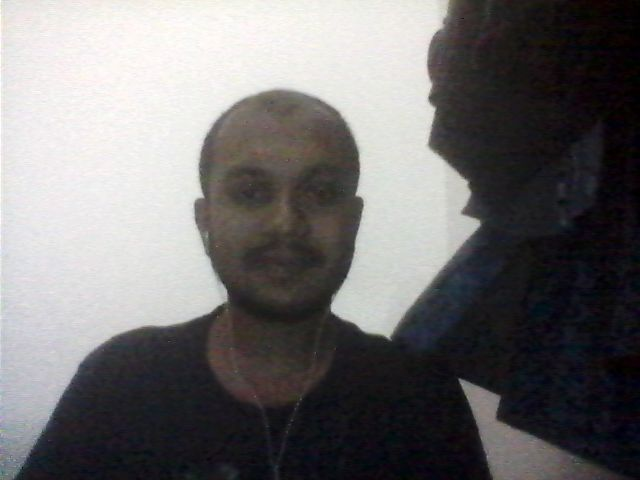

In [13]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# currentImgLoc=face_recognition.face_locations(captureImg)
# currentImgEnc=face_recognition.face_encodings(captureImg,currentImgLoc)

# Test the captured picture

Me


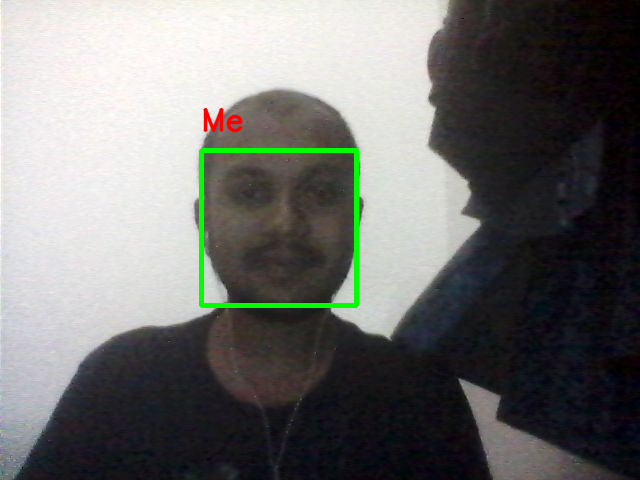

In [38]:
captureImg = "/content/photo.jpg"
result_image = face_recognition.load_image_file(captureImg)
result_image_read = cv2.imread(captureImg)

result_image_face_location = face_recognition.face_locations(result_image)
result_image_face_encodings = face_recognition.face_encodings(result_image, result_image_face_location)



# for attendence record list
attendenceInfo=[] 

for (top, right, bottom, left), face_encoding in zip(result_image_face_location, result_image_face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(imgData, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(imgData, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = imgName[best_match_index]

    # Draw a box around 
    cv2.rectangle(result_image_read,(left, top), (right, bottom), (0,255,0),3 )
    cv2.putText(result_image_read,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    # print(name)

    # for attendence
    
    if name not in attendenceInfo:
      timeFrame=datetime.now()
      timeFrame=timeFrame.strftime("%Y-%m-%d %H:%M:%S")
      attendenceInfo.append([name,timeFrame])
      # AttendenceFunction(data)



cv2_imshow(result_image_read)

In [41]:
attendenceInfo

[['Me', '2021-09-06 16:31:13']]

In [42]:
df=pd.DataFrame(data=attendenceInfo,columns=['Name','time'])
  
df.to_csv('attendence.csv',index=False)
df

,Name,time
0,Me,2021-09-06 16:31:13
